In [118]:
import boto3

In [119]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [120]:
#Download training and test data
s3client = boto3.client('s3', region_name='us-east-2')
files = s3client.list_objects(Bucket='rotation-images')['Contents']
s3 = boto3.resource('s3')

for file in files:
    if '_batch' in file['Key']:
        s3.Bucket('rotation-images').download_file(file['Key'], '/Users/lievgarcia/Downloads/' + file['Key'])

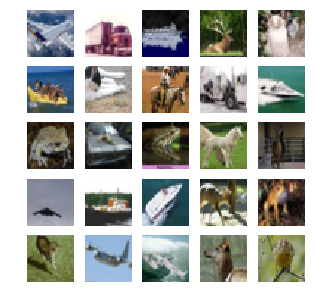

In [121]:
import numpy as np
from matplotlib import pyplot as plt

data = unpickle('/Users/lievgarcia/Downloads/cifar-10-batches-py/data_batch_1')

X = data[b'data'] 
Y = data[b'filenames']
X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")
Y = np.array(Y)

#sample 10 images
fig, axes1 = plt.subplots(5,5,figsize=(5,5))
for j in range(5):
    for k in range(5):
        i = np.random.choice(range(len(X)))
        axes1[j][k].set_axis_off()
        axes1[j][k].imshow(X[i:i+1][0])        